<a href="https://colab.research.google.com/github/devesh8423/Complete_DeepLearning/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df=pd.read_csv("/content/adm_data .csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


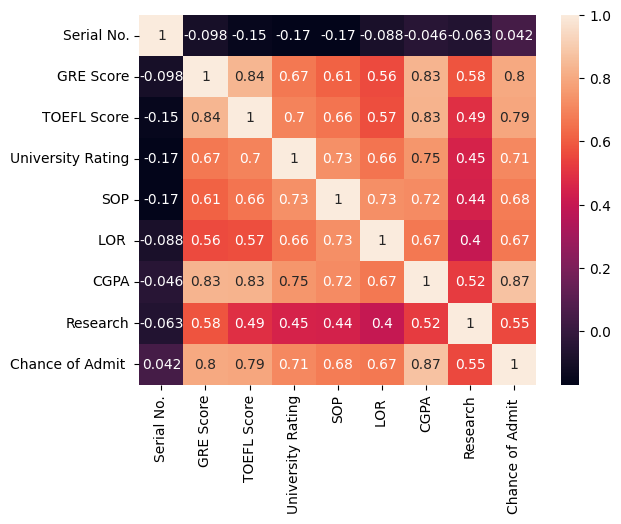

In [46]:
sns.heatmap(df.corr(),annot=True);

In [47]:
df=df.iloc[:,1 :]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [48]:
df.isnull().sum().sum()

np.int64(0)

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
x=df.iloc[:,:-1]


In [51]:
y=df["Chance of Admit "]

In [52]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [53]:
y=df["Chance of Admit "]

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mx=MinMaxScaler()
x_scaled=mx.fit_transform(x)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [58]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [59]:
model=Sequential ()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102 (408.00 B)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["r2_score"])

In [79]:
history=model.fit(x_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - r2_score: 0.6946 - val_loss: 0.0060 - val_r2_score: 0.7208
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - r2_score: 0.6486 - val_loss: 0.0060 - val_r2_score: 0.7213
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - r2_score: 0.6334 - val_loss: 0.0060 - val_r2_score: 0.7219
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - r2_score: 0.7078 - val_loss: 0.0060 - val_r2_score: 0.7222
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - r2_score: 0.7073 - val_loss: 0.0059 - val_r2_score: 0.7226
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - r2_score: 0.7121 - val_loss: 0.0059 - val_r2_score: 0.7232
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055 - r2_score: 0.7064 - val_loss: 0.0059 - val_r2_score: 0.7236
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - r2_score: 0.6638 - val_loss: 0.0059 - val_r2_score: 0.7

In [80]:
y_pred_train=model.predict(x_train)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [81]:
y_pred_test=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(y_train,y_pred_train)

0.7615542813865469

In [84]:
r2_score(y_test,y_pred_test)

0.77874826673529

In [76]:
import matplotlib.pyplot as plt


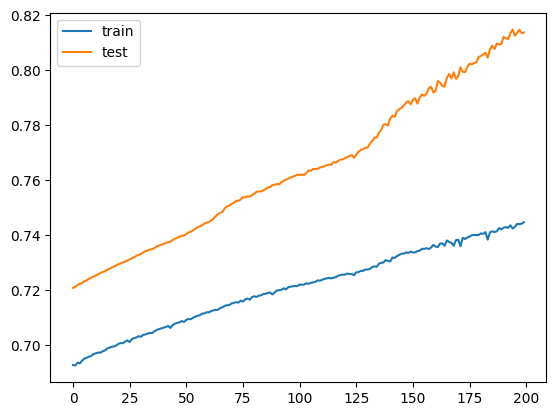

In [85]:
plt.plot(history.history["r2_score"],label="train")
plt.plot(history.history["val_r2_score"],label="test")
plt.legend()

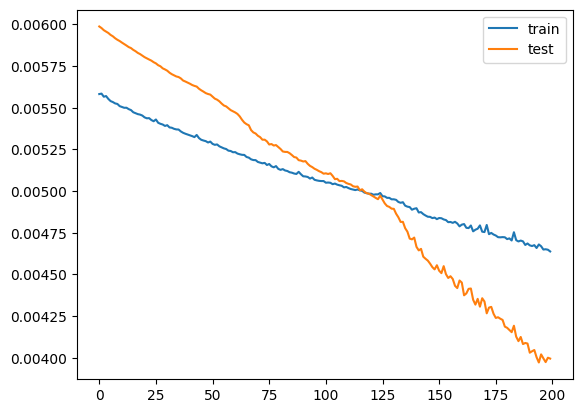

In [86]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend()